In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
salary = pd.read_csv("Employee_Salary.csv")

In [3]:
salary.head(10)

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448
5,2.682068,69119.79132
6,2.761983,71063.36476
7,2.927601,71356.14382
8,2.969968,74265.40359
9,3.059107,74804.11404


In [4]:
salary.tail(5)

,Years of Experience,Salary
1995,19.178575,421534.6910
1996,19.254499,430478.0265
1997,19.353369,438090.8454
1998,19.842520,482242.1608
1999,20.000000,500000.0000


In [5]:
salary.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


In [6]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  2000 non-null   float64
 1   Salary               2000 non-null   float64
dtypes: float64(2)
memory usage: 31.3 KB


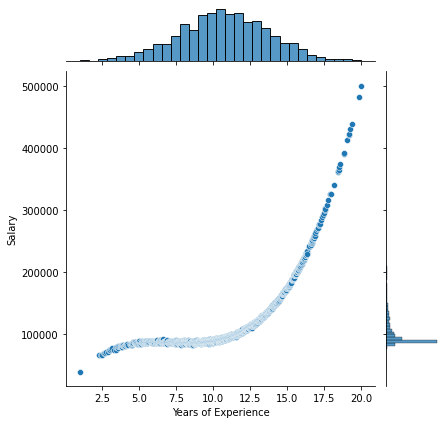

In [7]:
sns.jointplot(data=salary,x="Years of Experience",y="Salary")

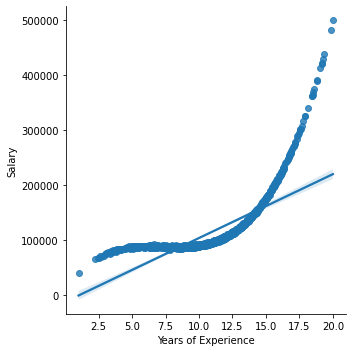

In [8]:
sns.lmplot(data=salary,x="Years of Experience",y="Salary")

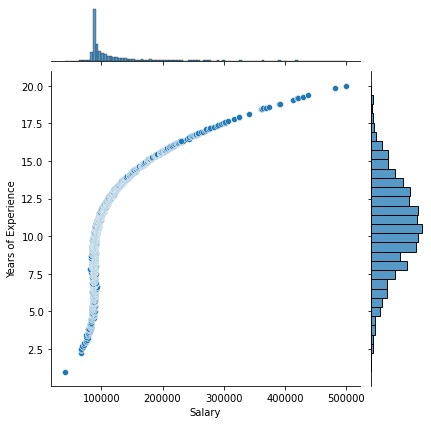

In [9]:
sns.jointplot(data=salary,x="Salary",y="Years of Experience")

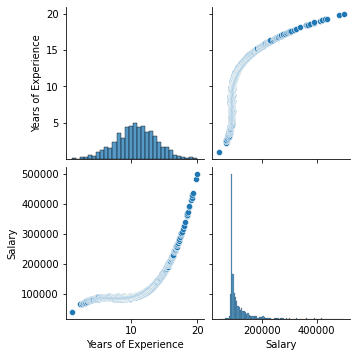

In [10]:
sns.pairplot(salary)

In [11]:
x = salary[['Years of Experience']]
x

,Years of Experience
0,1.000000
1,2.257942
2,2.450875
3,2.498713
4,2.613729
...,...
1995,19.178575
1996,19.254499
1997,19.353369
1998,19.842520


In [12]:
y = salary[['Salary']]
y

,Salary
0,40000.00000
1,65979.42119
2,67253.57549
3,67342.43510
4,70532.20448
...,...
1995,421534.69100
1996,430478.02650
1997,438090.84540
1998,482242.16080


In [13]:
# we will use whole data for training

In [14]:
x_train = x
y_train = y

In [15]:
x_train.shape

(2000, 1)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regressor = LinearRegression(fit_intercept=True)

In [18]:
regressor.fit(x_train,y_train)

LinearRegression()

In [19]:
print("Linear model coeff(m): {} and intercept(b): {}".format(regressor.coef_,regressor.intercept_))

Linear model coeff(m): [[11640.22916165]] and intercept(b): [-13063.09931519]


In [20]:
regressor1 = LinearRegression(fit_intercept=False)
regressor1.fit(x_train,y_train)

LinearRegression(fit_intercept=False)

In [21]:
print("Linear model coeff(m): {} and intercept(b): {}".format(regressor1.coef_,regressor1.intercept_))

Linear model coeff(m): [[10511.28514602]] and intercept(b): 0.0


Text(0.5, 1.0, 'salary vs year of exp(Linear with intercept not 0)')

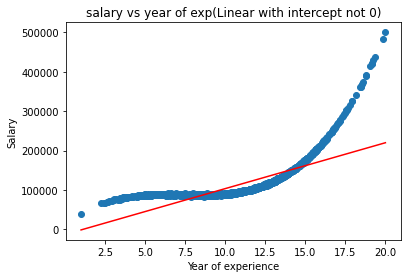

In [22]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),color='red')
plt.xlabel("Year of experience")
plt.ylabel("Salary")
plt.title("salary vs year of exp(Linear with intercept not 0)")

Text(0.5, 1.0, 'salary vs year of exp(Linear with intercept 0)')

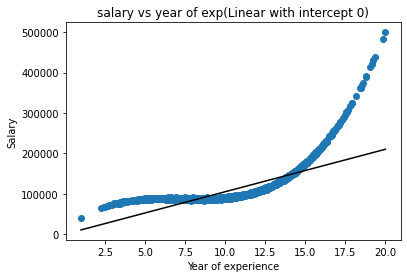

In [23]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor1.predict(x_train),color='black')
plt.xlabel("Year of experience")
plt.ylabel("Salary")
plt.title("salary vs year of exp(Linear with intercept 0)")

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly_regressor = PolynomialFeatures(degree = 5)

In [26]:
x_columns = poly_regressor.fit_transform(x_train)

In [27]:
x_columns

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.25794198e+00, 5.09830199e+00, 1.15116701e+01,
        2.59926832e+01, 5.86899707e+01],
       [1.00000000e+00, 2.45087546e+00, 6.00679053e+00, 1.47218955e+01,
        3.60815324e+01, 8.84313424e+01],
       ...,
       [1.00000000e+00, 1.93533688e+01, 3.74552884e+02, 7.24886009e+03,
        1.40289863e+05, 2.71508145e+06],
       [1.00000000e+00, 1.98425197e+01, 3.93725587e+02, 7.81250771e+03,
        1.55019838e+05, 3.07598419e+06],
       [1.00000000e+00, 2.00000000e+01, 4.00000000e+02, 8.00000000e+03,
        1.60000000e+05, 3.20000000e+06]])

In [28]:
regressor = LinearRegression()
regressor.fit(x_columns, y_train)

LinearRegression()

In [29]:
print("Model coeff",regressor.coef_)

Model coeff [[ 0.00000000e+00  3.27949771e+04 -4.65578675e+03  2.24001236e+02
  -1.03521070e+00  2.09284278e-02]]


In [30]:
y_predit = regressor.predict(poly_regressor.fit_transform(x_train))

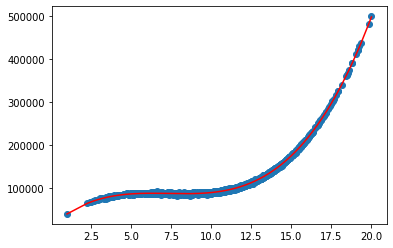

In [31]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_predit,color='red')